# S-Cubes usage example

In [ ]:
from splusdata.scubes.core import SCubes

OBJNAME = 'NGC1344'
RA = 52.08196       # DEG
DEC = -31.06817     # DEG

FIELD='SPLUS-s24s34'
STAMP_SIZE = 1000    # PIX
VERBOSITY_LEVEL = 1

creator = SCubes(RA, DEC, FIELD, size=STAMP_SIZE, verbose=VERBOSITY_LEVEL)  #, username='XXX', password='XXX')
scube = creator.create_cube(objname=OBJNAME, force=True, return_scube=True)

###
### SCubes.create_cube() write_fits parameter defaults to false. 
### One can write the output FITS after create_cube() call using:
###
#cubepath = f'{OBJNAME}_cube.fits'
#creator.write(cubepath, overwrite=True)

NGC1344 @ SPLUS-s24s34 - Downloading:   0%|          | 0/12 [00:00<?, ?it/s]

[2025-08-25T19:44:14.165349] - : Downloading zp_model SPLUS-s24s34_u_zp_model.json


[2025-08-25T19:44:17.084388] - : Downloading zp_model SPLUS-s24s34_F378_zp_model.json
[2025-08-25T19:44:19.952283] - : Downloading zp_model SPLUS-s24s34_F395_zp_model.json
[2025-08-25T19:44:22.819014] - : Downloading zp_model SPLUS-s24s34_F410_zp_model.json
[2025-08-25T19:44:25.586021] - : Downloading zp_model SPLUS-s24s34_F430_zp_model.json
[2025-08-25T19:44:28.453068] - : Downloading zp_model SPLUS-s24s34_g_zp_model.json
[2025-08-25T19:44:31.300738] - : Downloading zp_model SPLUS-s24s34_F515_zp_model.json
[2025-08-25T19:44:34.117673] - : Downloading zp_model SPLUS-s24s34_r_zp_model.json
[2025-08-25T19:44:36.850187] - : Downloading zp_model SPLUS-s24s34_F660_zp_model.json
[2025-08-25T19:44:39.717125] - : Downloading zp_model SPLUS-s24s34_i_zp_model.json
[2025-08-25T19:44:42.415356] - : Downloading zp_model SPLUS-s24s34_F861_zp_model.json
[2025-08-25T19:44:45.210818] - : Downloading zp_model SPLUS-s24s34_z_zp_model.json


/home/lacerda/.pyenv/versions/dev/lib/python3.12/site-packages/splusdata/scubes/core.py:153: RuntimeWarning: divide by zero encountered in divide
  calib_data_err__byx = np.sqrt(1/weidata__byx + np.abs(calib_data__byx)/gain__byx)
/home/lacerda/.pyenv/versions/dev/lib/python3.12/site-packages/splusdata/scubes/core.py:177: RuntimeWarning: cdelt will be ignored since cd is present
  nw.wcs.cdelt = [w.wcs.cdelt[0], w.wcs.cdelt[1], 1]
/home/lacerda/.pyenv/versions/dev/lib/python3.12/site-packages/splusdata/scubes/read.py:294: RuntimeWarning: divide by zero encountered in log10
  self.mag_arcsec2__lyx = -2.5*np.log10(x)
/home/lacerda/.pyenv/versions/dev/lib/python3.12/site-packages/splusdata/scubes/read.py:294: RuntimeWarning: invalid value encountered in log10
  self.mag_arcsec2__lyx = -2.5*np.log10(x)
/home/lacerda/.pyenv/versions/dev/lib/python3.12/site-packages/splusdata/scubes/read.py:295: RuntimeWarning: divide by zero encountered in divide
  self.emag_arcsec2__lyx = (2.5*np.log10(np.e

/tmp/ipykernel_65467/3045989158.py:11: RuntimeWarning: divide by zero encountered in log10
  logflux__yx = np.log10(scube.flux__lyx[i]) + 18
/tmp/ipykernel_65467/3045989158.py:11: RuntimeWarning: invalid value encountered in log10
  logflux__yx = np.log10(scube.flux__lyx[i]) + 18


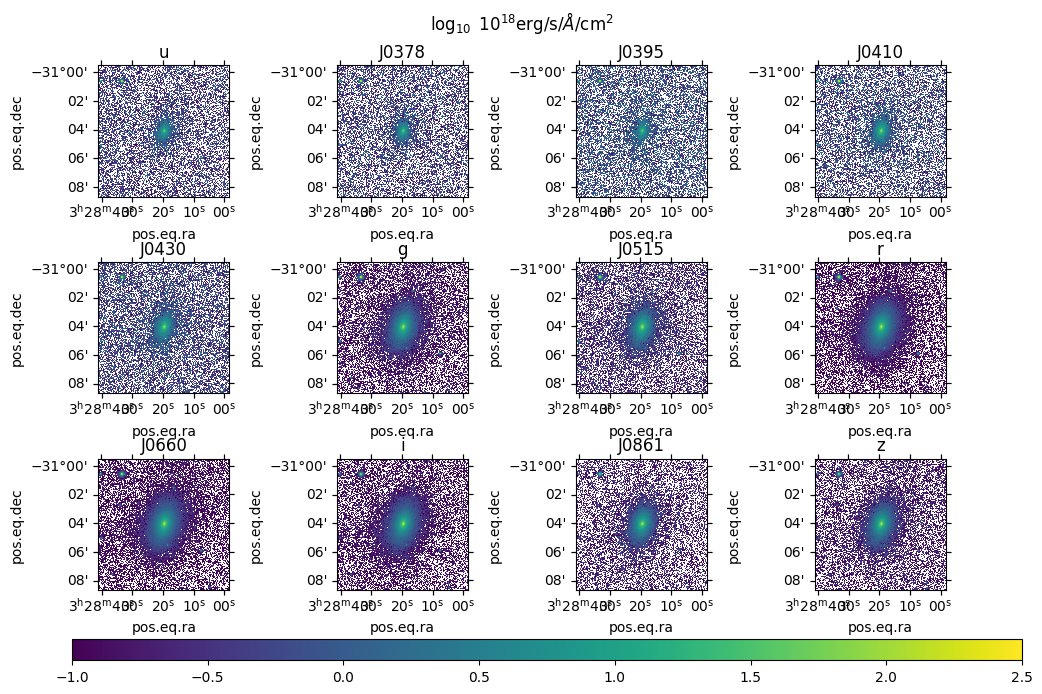

In [6]:
import numpy as np
import matplotlib.pyplot as plt

f = plt.figure()
f.set_size_inches(10, 7)

# plot filters
for i, filt in enumerate(scube.filters):
    ax = f.add_subplot(3, 4, i+1, projection=scube.wcs)
    ax.set_title(filt)
    logflux__yx = np.log10(scube.flux__lyx[i]) + 18
    im = ax.imshow(logflux__yx, origin='lower', vmin=-1, vmax=2.5, interpolation='nearest')
    #ax.grid()

f.suptitle(r'$\log_{10}$ 10$^{18}$erg/s/$\AA$/cm$^2$')
f.subplots_adjust(left=0.05, right=0.95, bottom=0.15, top=0.9, wspace=0.3, hspace=0.5)
left, bottom, width, height = 0.05, 0.05, 0.95, 0.03
cb_ax = f.add_axes([left, bottom, width, height])
f.colorbar(im, cax=cb_ax, location='bottom')

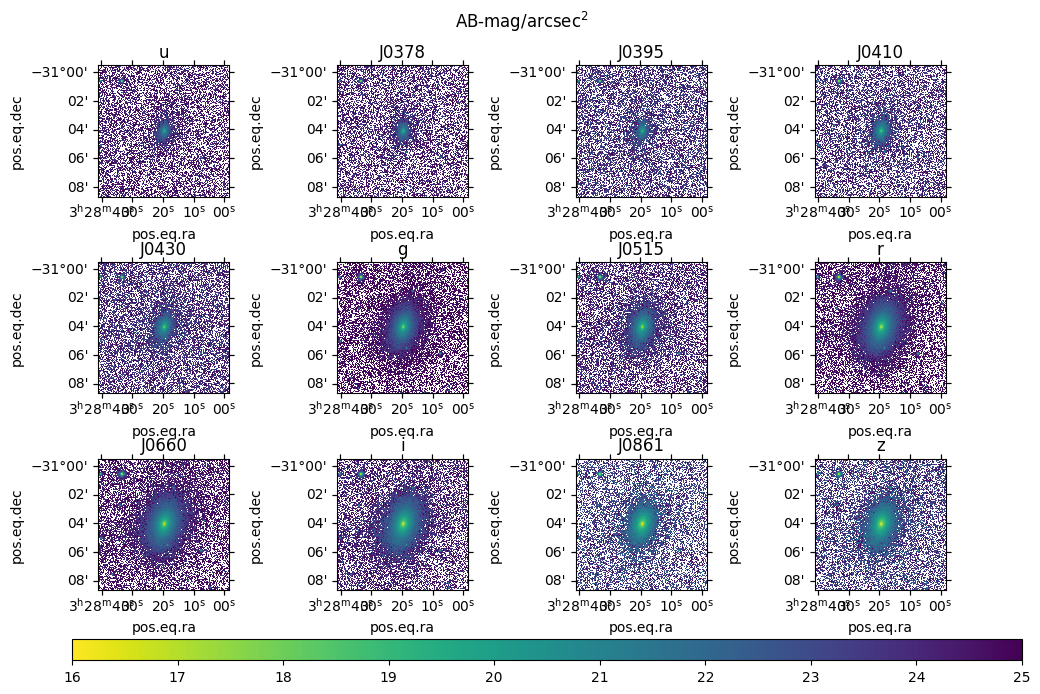

In [7]:
f = plt.figure()
f.set_size_inches(10, 7)

# plot filters
for i, filt in enumerate(scube.filters):
    ax = f.add_subplot(3, 4, i+1, projection=scube.wcs)
    ax.set_title(filt)
    im = ax.imshow(scube.mag_arcsec2__lyx[i], origin='lower', vmin=16, vmax=25, interpolation='nearest', cmap='viridis_r')
    #ax.grid()

f.suptitle(r'AB-mag/arcsec$^2$')
f.subplots_adjust(left=0.05, right=0.95, bottom=0.15, top=0.9, wspace=0.3, hspace=0.5)
left, bottom, width, height = 0.05, 0.05, 0.95, 0.03
cb_ax = f.add_axes([left, bottom, width, height])
f.colorbar(im, cax=cb_ax, location='bottom')

## Lupton RGB

['u', 'J0378', 'J0395', 'J0410', 'J0430', 'g', 'J0515', 'r', 'J0660', 'i', 'J0861', 'z']


Text(0.5, 0.98, 'RGB examples')

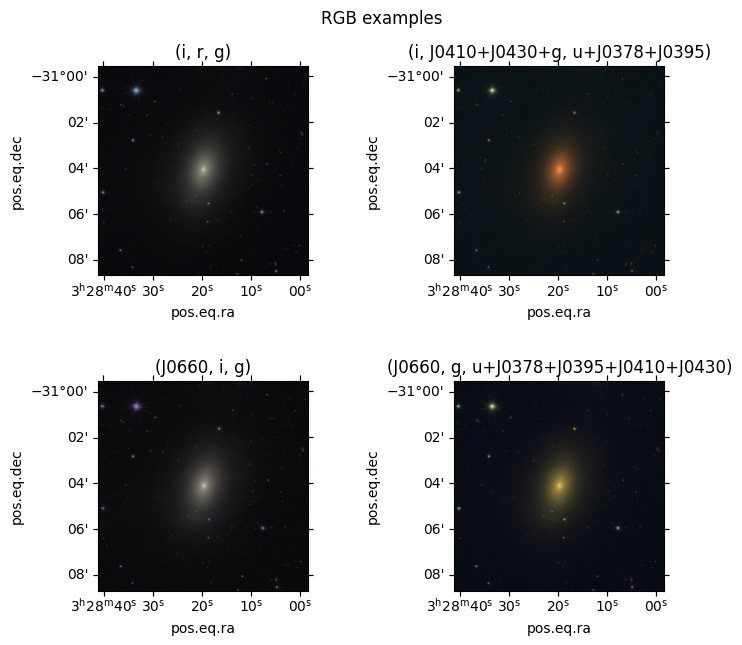

In [4]:
print(scube.filters)

rgblist = [
    ['i', 'r', 'g'],
    [9, ['J0410', 'J0430', 'g'], [0, 1, 2]],
    [8, 9, 5],
    [8, 5, [0, 1, 2, 3, 4]]
] 
titlelist = [
    '(i, r, g)',
    '(i, J0410+J0430+g, u+J0378+J0395)',
    '(J0660, i, g)',
    '(J0660, g, u+J0378+J0395+J0410+J0430)'
]

f = plt.figure()
f.set_size_inches(7, 7)
for i, rgb in enumerate(rgblist):
    ax = f.add_subplot(2, 2, i+1, projection=scube.wcs)
    RGB__yxc = scube.lRGB_image(rgb=rgb, Q=10, stretch=5, im_max=1)
    ax.imshow(RGB__yxc, origin='lower')
    ax.set_title(titlelist[i])
f.subplots_adjust(left=0.05, right=0.95, bottom=0.15, top=0.9, wspace=0.3, hspace=0.5)
f.suptitle('RGB examples')

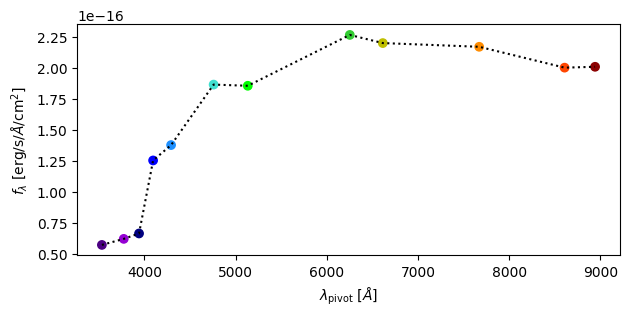

In [5]:
FILTER_COLORS = {
    'u': 'indigo',
    'J0378': 'darkviolet',
    'J0395': 'navy',
    'J0410': 'b',
    'J0430': 'dodgerblue',
    'g': 'turquoise',
    'J0515': 'lime',
    'r': 'limegreen',
    'J0660': 'y',
    'i': 'darkorange',
    'J0861': 'orangered',
    'z': 'darkred',
}

c = [FILTER_COLORS[x] for x in scube.filters]

plt.figure(figsize=(7, 3))
plt.ylabel(r'$f_\lambda$ [erg/s/$\AA$/cm$^2$]')
plt.xlabel(r'$\lambda_{\rm pivot}$ [$\AA$]')
x, y = scube.pivot_wave, scube.flux__lyx[:, scube.i_y0, scube.i_x0]
plt.plot(x,y, 'k:')
plt.scatter(x, y, c=c)